In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re 
import time 
from collections import Counter
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import calendar
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier


In [34]:
orig_bets_encrypted = pd.read_csv('bets_encrypted_clnd.csv')
orig_tag_changes = pd.read_csv('tag_changes_clnd.csv')

bets_encrypted = orig_bets_encrypted.copy()
tag_changes = orig_tag_changes.copy()

# keep only records where 'hours_to_event' is more than 0.
bets_encrypted = bets_encrypted[bets_encrypted['hours_to_event']>0]

print(bets_encrypted.shape)
print(tag_changes.shape)

(2632076, 8)
(83806, 5)


In [35]:
num_unique_users_bets = bets_encrypted['encrypted_user_no'].nunique()

num_unique_users_tags = tag_changes['encrypted_user_no'].nunique()


print(f"The number of unique user IDs in bets_encrypted is: {num_unique_users_bets}")
print(f"The number of unique user IDs in tag_changes is: {num_unique_users_tags}")

The number of unique user IDs in bets_encrypted is: 14831
The number of unique user IDs in tag_changes is: 47591


In [36]:
print(bets_encrypted['betTimestamp'].min())
print(bets_encrypted['betTimestamp'].max())
print(tag_changes['insert_date'].min())
print(tag_changes['insert_date'].max())

2022-12-27 00:00:19
2023-05-01 23:59:49
2023-01-01 00:04:05
2023-05-19 13:53:55


In [37]:
print(bets_encrypted.columns)
print(tag_changes.columns)

Index(['betTimestamp', 'odds_units', 'stake_gbp', 'count_legs',
       'hours_to_event', 'betDate', 'edge', 'encrypted_user_no'],
      dtype='object')
Index(['insert_date', 'riskexposureracing', 'riskexposureprematch',
       'riskexposurelivebetting', 'encrypted_user_no'],
      dtype='object')


In [38]:
# Assuming you have a DataFrame named 'bets_encrypted' containing the dataset
# Calculate the maximum values for each column
max_values = bets_encrypted.max()

# Calculate the minimum values for each column
min_values = bets_encrypted.min()

# Print the maximum and minimum values for each column
for column in bets_encrypted.columns:
    print(f"Column: {column}")
    print(f"Max Value: {max_values[column]}")
    print(f"Min Value: {min_values[column]}")
    print("-------------------------------")

Column: betTimestamp
Max Value: 2023-05-01 23:59:49
Min Value: 2022-12-27 00:00:19
-------------------------------
Column: odds_units
Max Value: 14716547.74
Min Value: 1.01
-------------------------------
Column: stake_gbp
Max Value: 37407.54
Min Value: 0.0
-------------------------------
Column: count_legs
Max Value: 40
Min Value: 1
-------------------------------
Column: hours_to_event
Max Value: 24287.13027777778
Min Value: 0.0002777777777777
-------------------------------
Column: betDate
Max Value: 2023-05-01
Min Value: 2022-12-27
-------------------------------
Column: edge
Max Value: 71.9672131147541
Min Value: -78.98550724637681
-------------------------------
Column: encrypted_user_no
Max Value: b'~}\xa7(\xb6\x19\xa38E@\xbc\xa5\x9f\xe6x\x0e'
Min Value: b"  \x88\r!v\xc3\x14\x13\x1dy\x80\xea\x17\xf0'"
-------------------------------


In [39]:
# Assuming you have a DataFrame named 'bets_encrypted' containing the dataset
# Calculate the maximum values for each column
max_values = tag_changes.max()

# Calculate the minimum values for each column
min_values = tag_changes.min()

# Print the maximum and minimum values for each column
for column in tag_changes.columns:
    print(f"Column: {column}")
    print(f"Max Value: {max_values[column]}")
    print(f"Min Value: {min_values[column]}")
    print("-------------------------------")

Column: insert_date
Max Value: 2023-05-19 13:53:55
Min Value: 2023-01-01 00:04:05
-------------------------------
Column: riskexposureracing
Max Value: 10.0
Min Value: 0.0
-------------------------------
Column: riskexposureprematch
Max Value: 50.0
Min Value: 0.0
-------------------------------
Column: riskexposurelivebetting
Max Value: 50.0
Min Value: 0.0
-------------------------------
Column: encrypted_user_no
Max Value: b'~}\xa7(\xb6\x19\xa38E@\xbc\xa5\x9f\xe6x\x0e'
Min Value: b"  \x88\r!v\xc3\x14\x13\x1dy\x80\xea\x17\xf0'"
-------------------------------


In [40]:
print(bets_encrypted.describe())
print(tag_changes.describe())

         odds_units     stake_gbp    count_legs  hours_to_event          edge
count  2.632076e+06  2.632076e+06  2.632076e+06    2.632076e+06  2.632076e+06
mean   2.240406e+04  1.746270e+01  4.015995e+00    2.339053e+01 -3.389991e-01
std    3.036543e+05  1.292620e+02  3.076407e+00    2.020897e+02  1.873660e+00
min    1.010000e+00  0.000000e+00  1.000000e+00    2.777778e-04 -7.898551e+01
25%    3.460000e+00  2.200000e-01  2.000000e+00    1.380278e+00 -2.563708e-01
50%    2.100000e+01  1.880000e+00  3.000000e+00    4.147222e+00  0.000000e+00
75%    2.990000e+02  8.830000e+00  5.000000e+00    1.105167e+01  0.000000e+00
max    1.471655e+07  3.740754e+04  4.000000e+01    2.428713e+04  7.196721e+01
       riskexposureracing  riskexposureprematch  riskexposurelivebetting
count        83806.000000          83806.000000              83806.00000
mean             0.207603              1.798483                  0.99429
std              0.360313              2.640295                  1.18735
min   

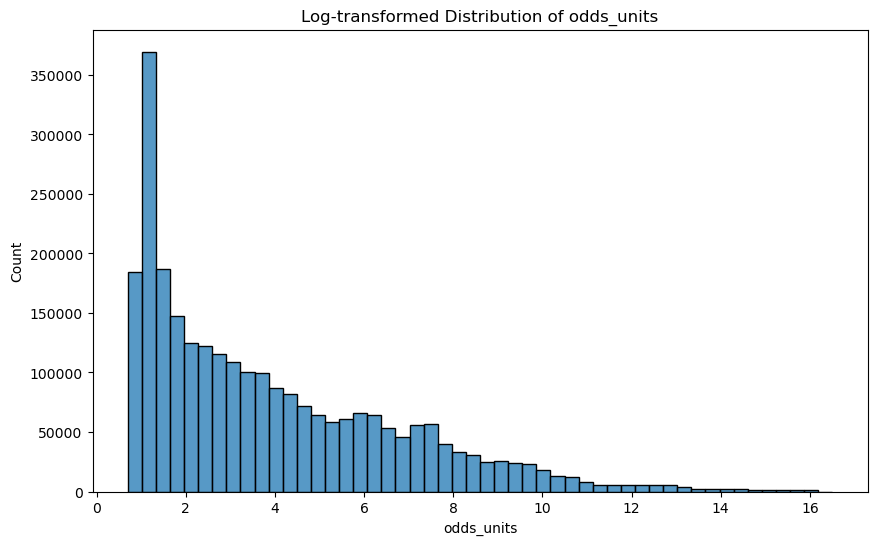

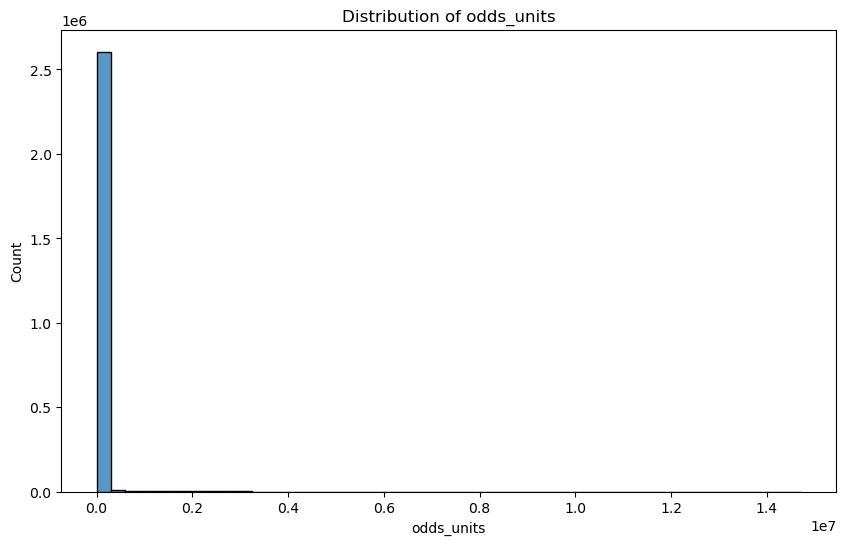

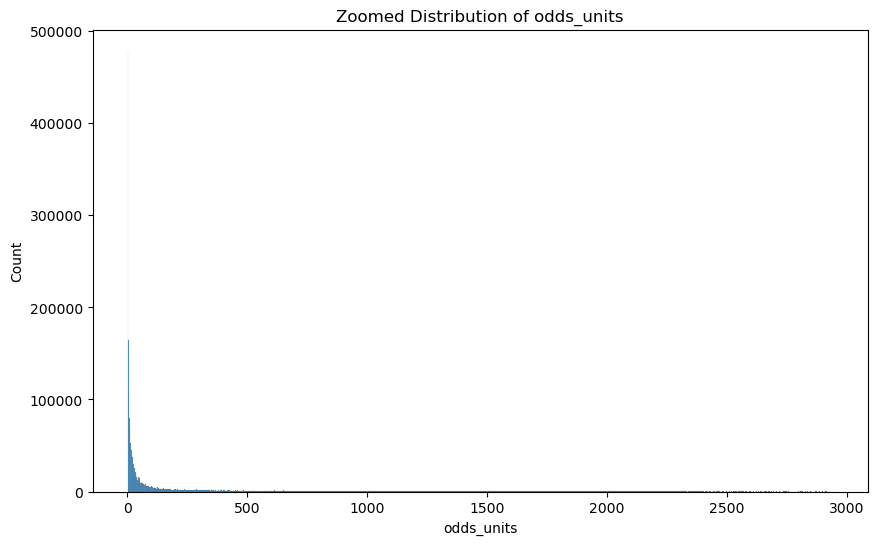

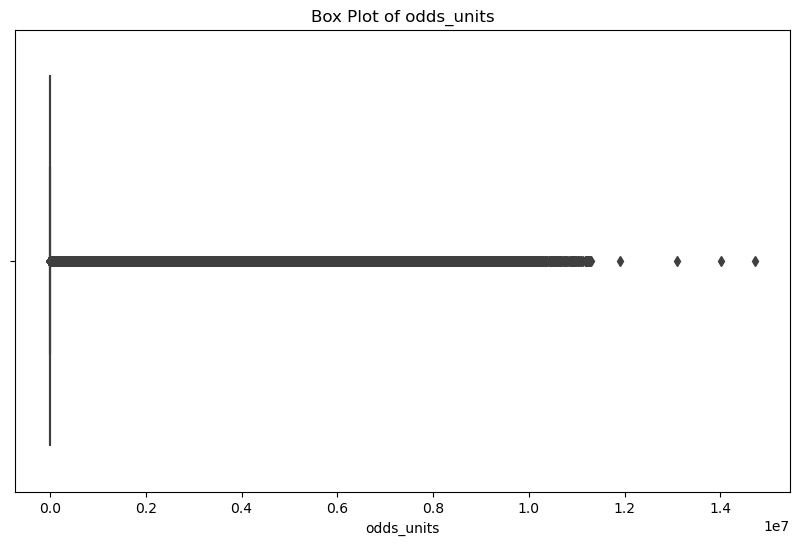

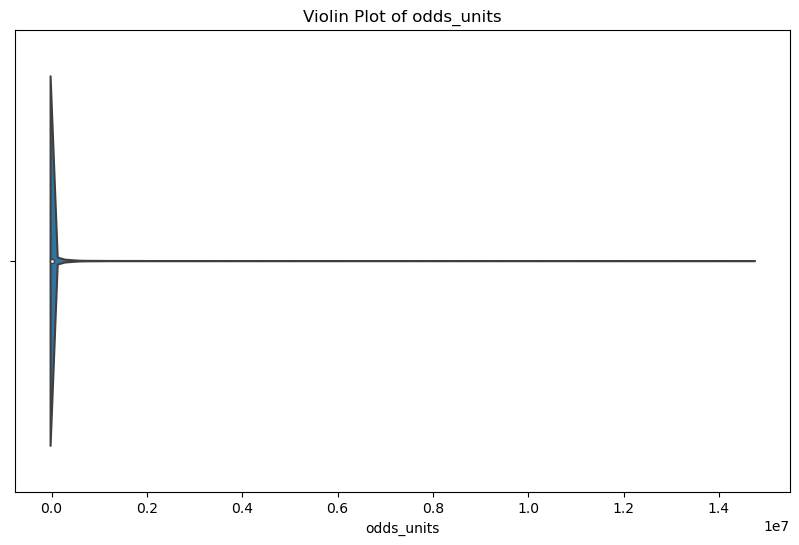

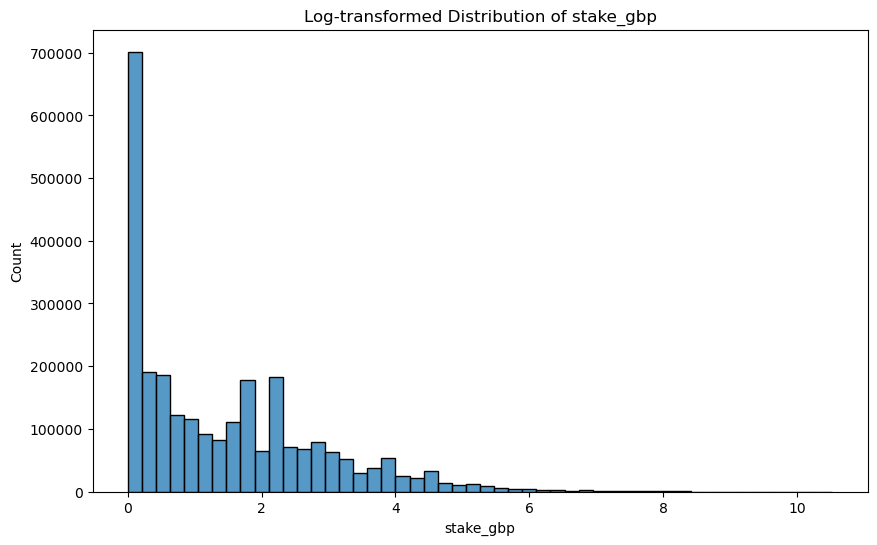

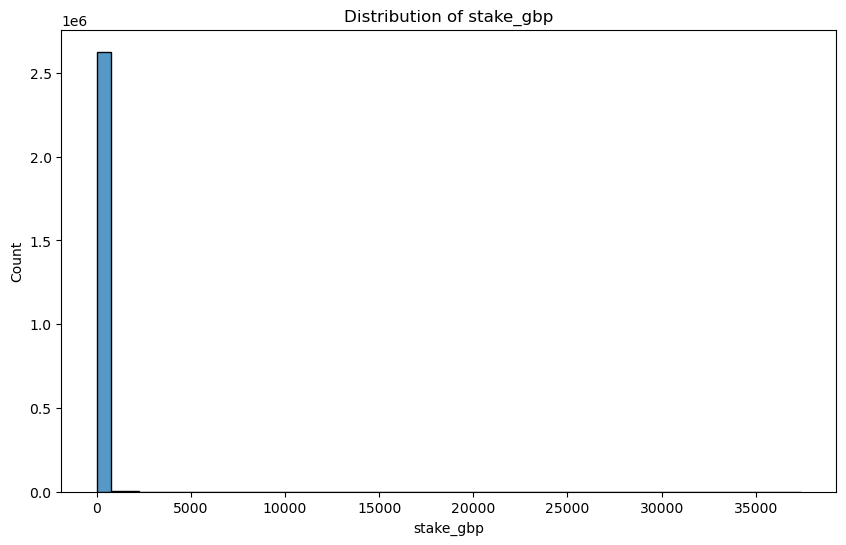

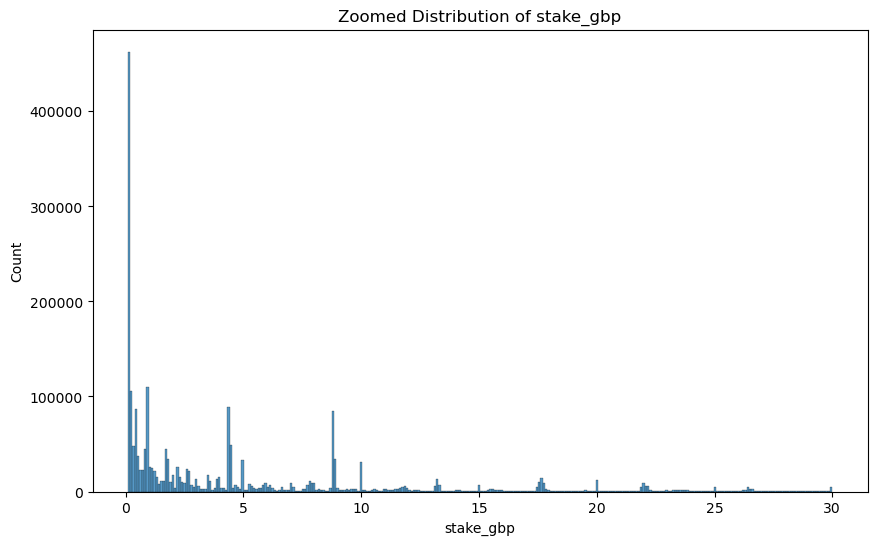

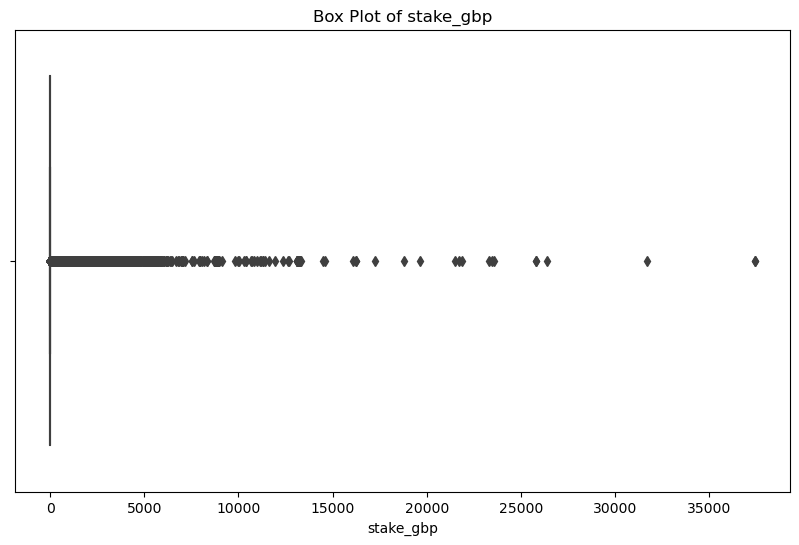

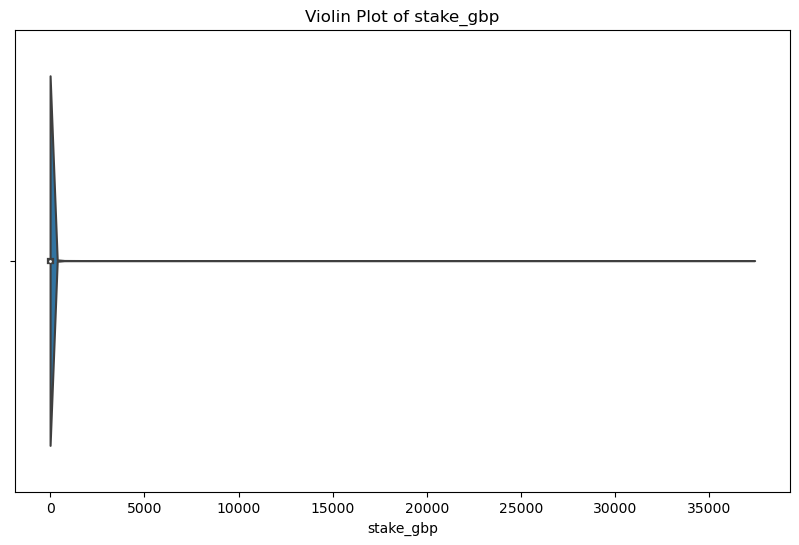

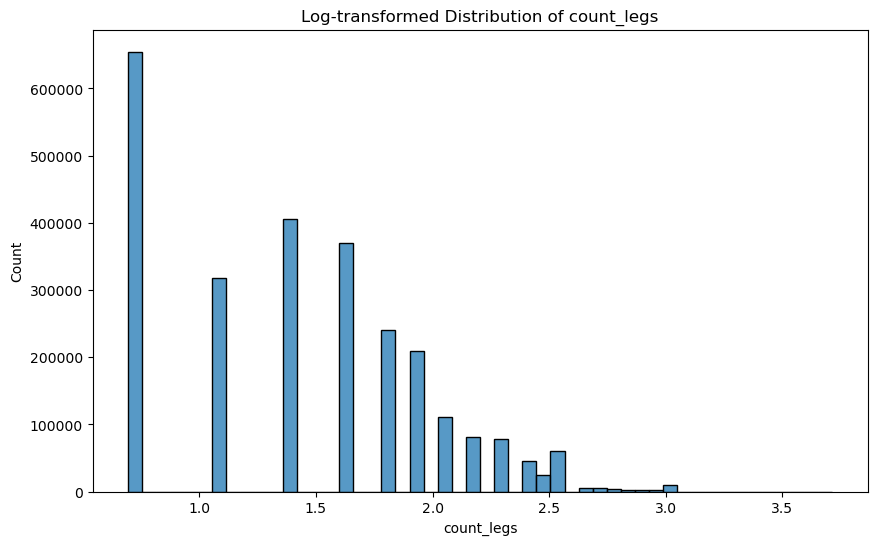

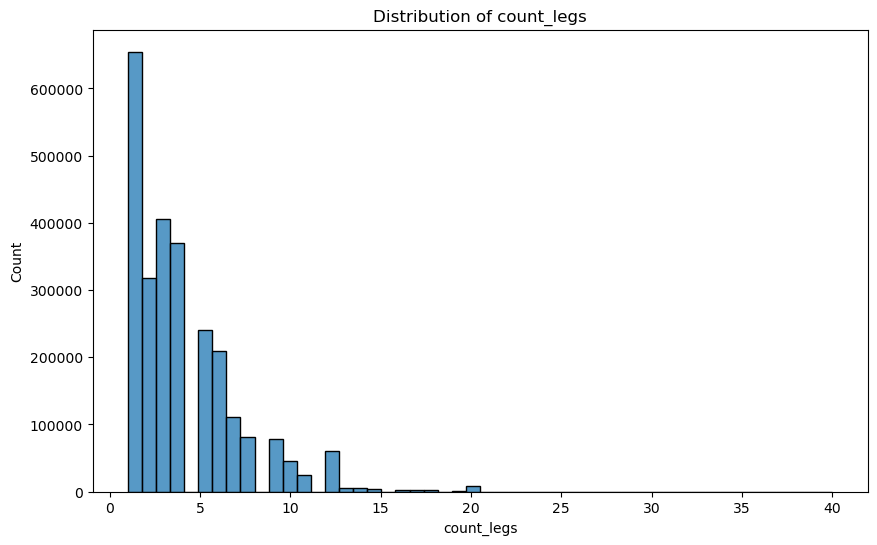

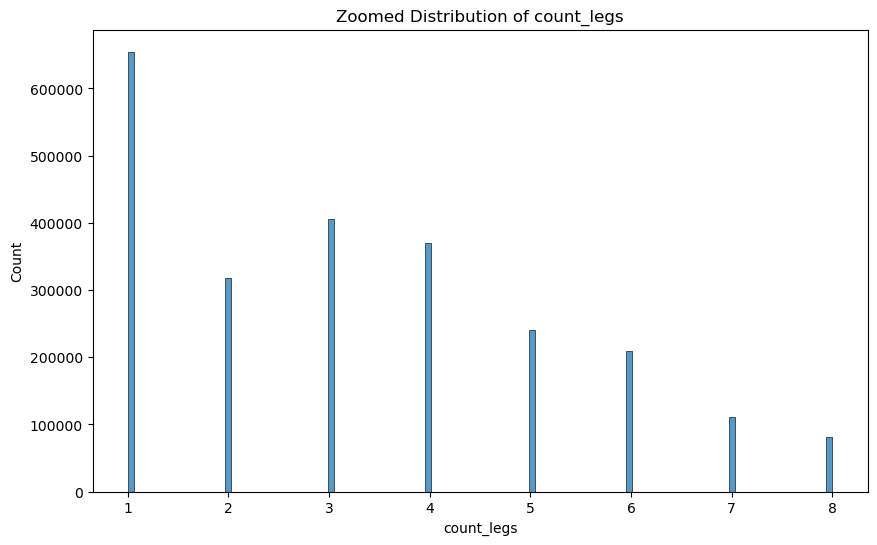

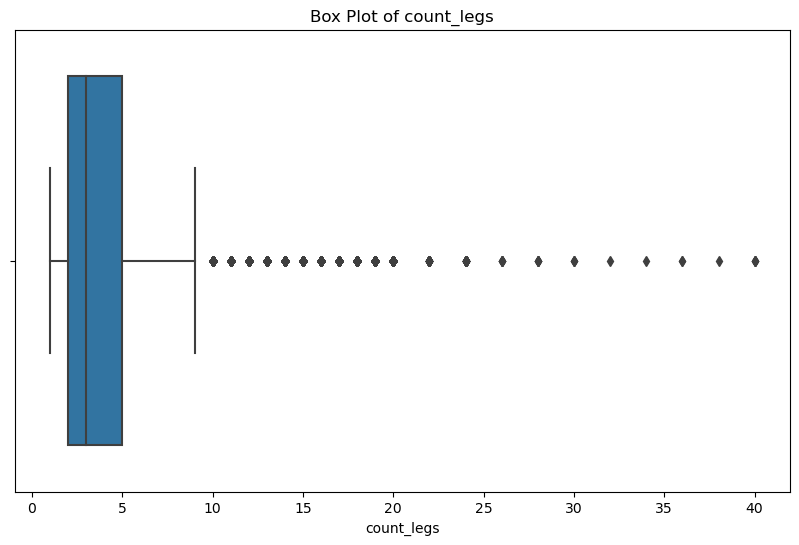

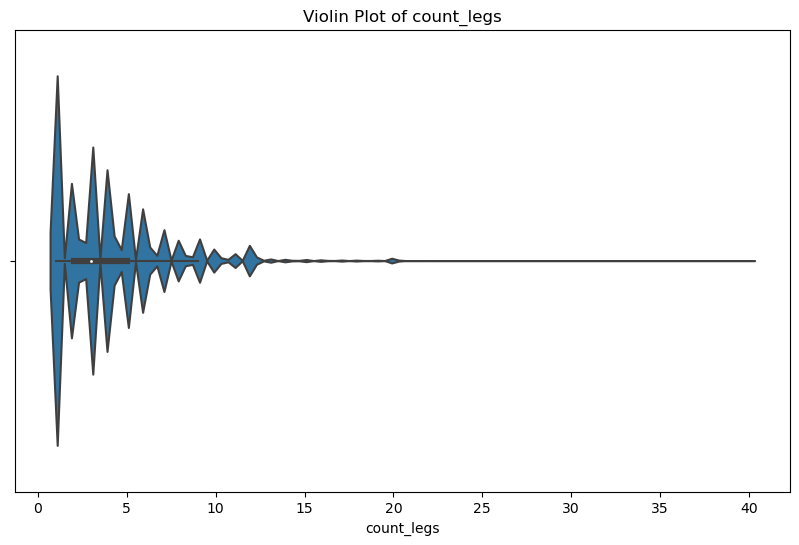

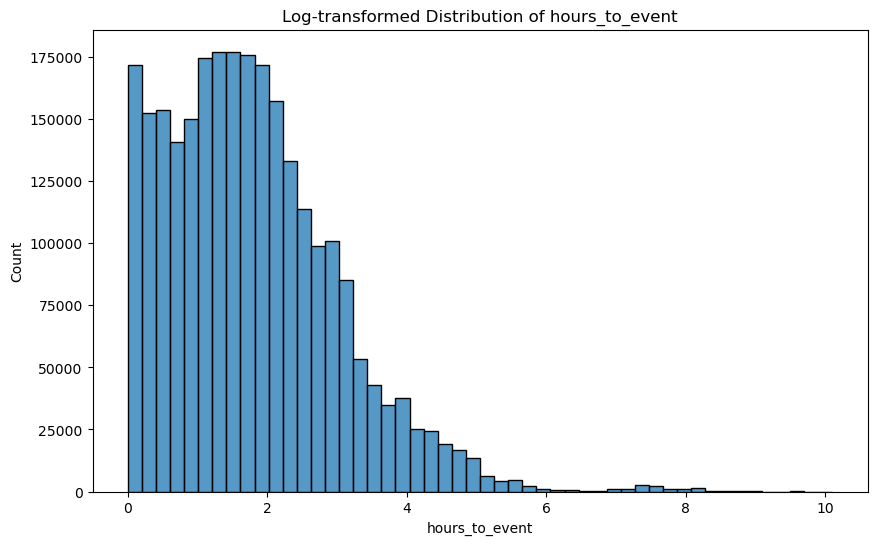

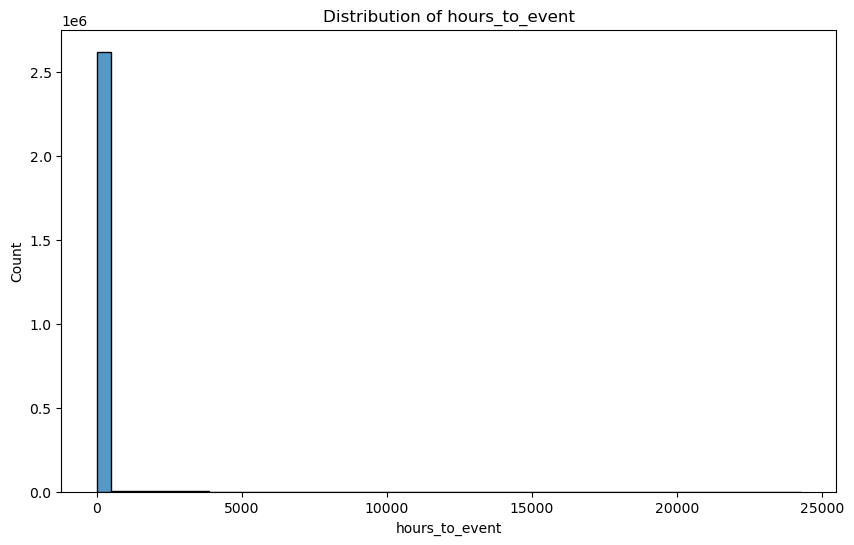

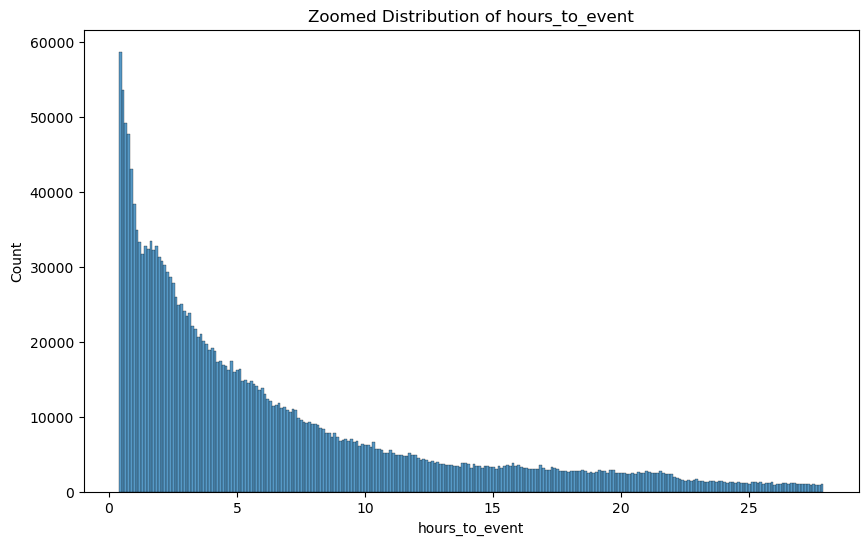

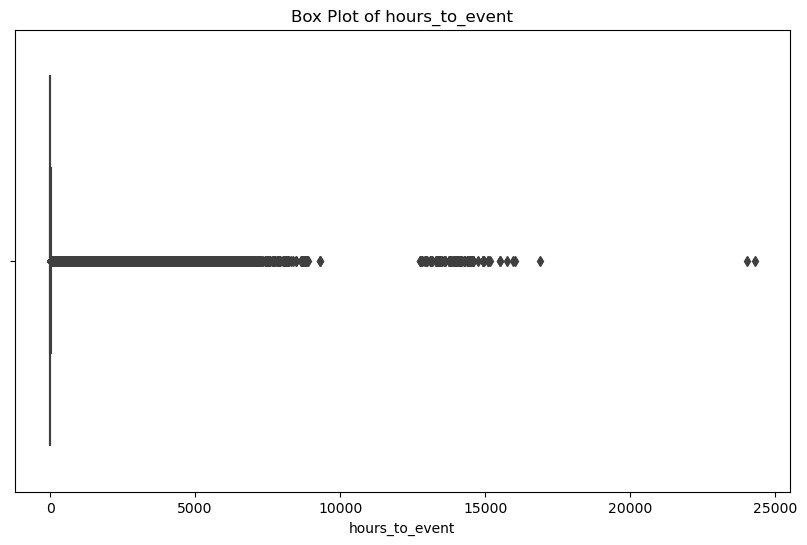

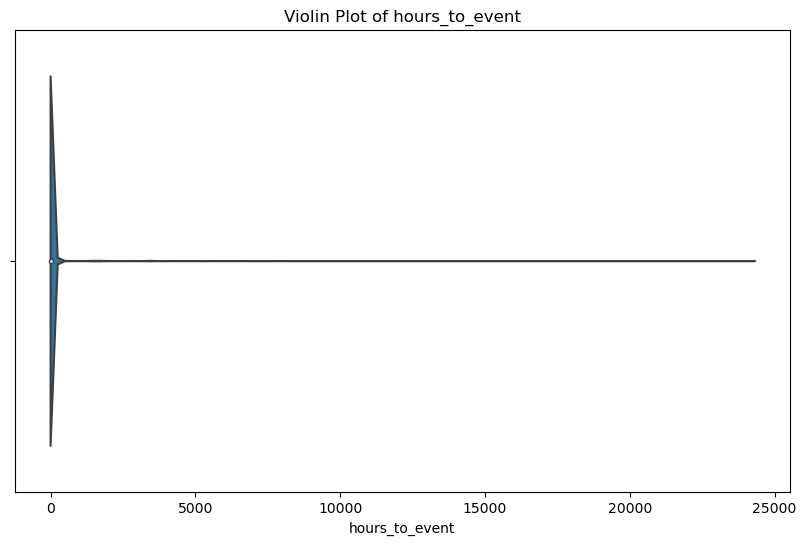

/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


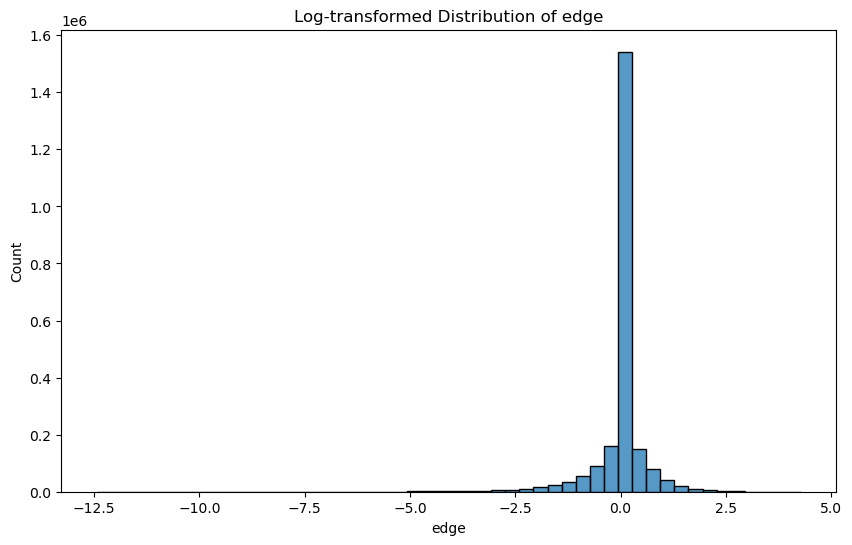

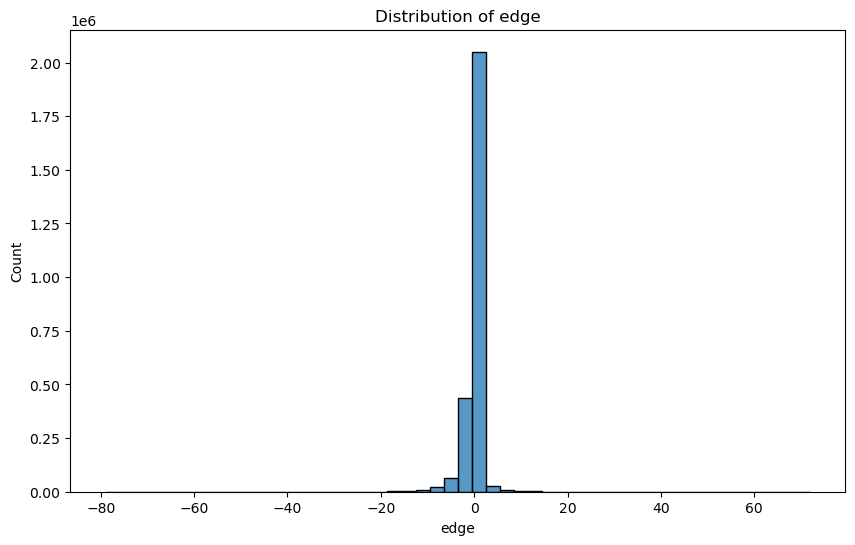

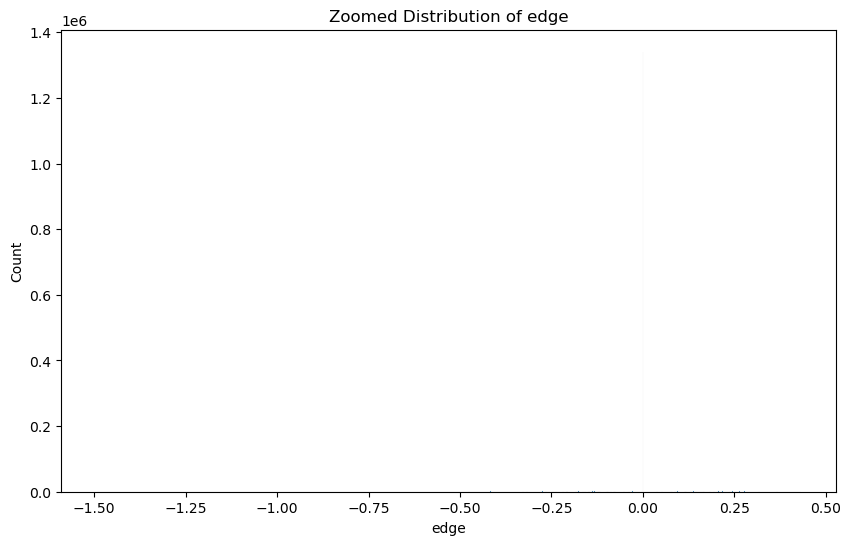

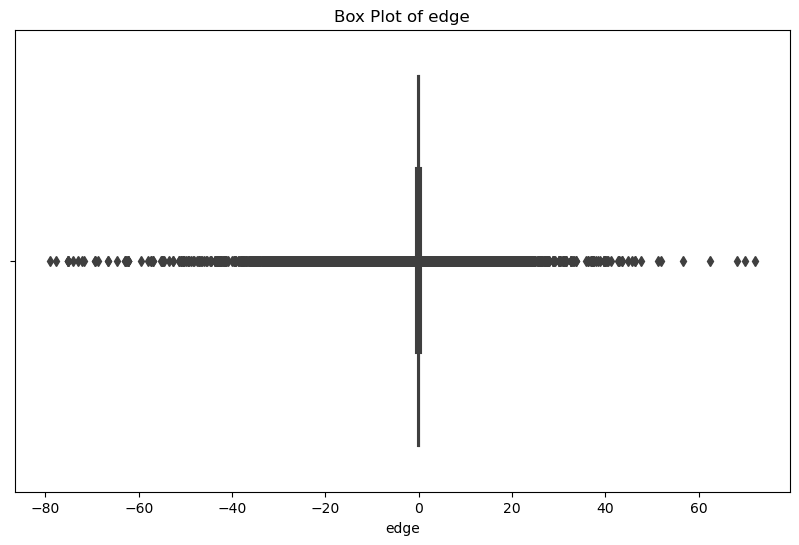

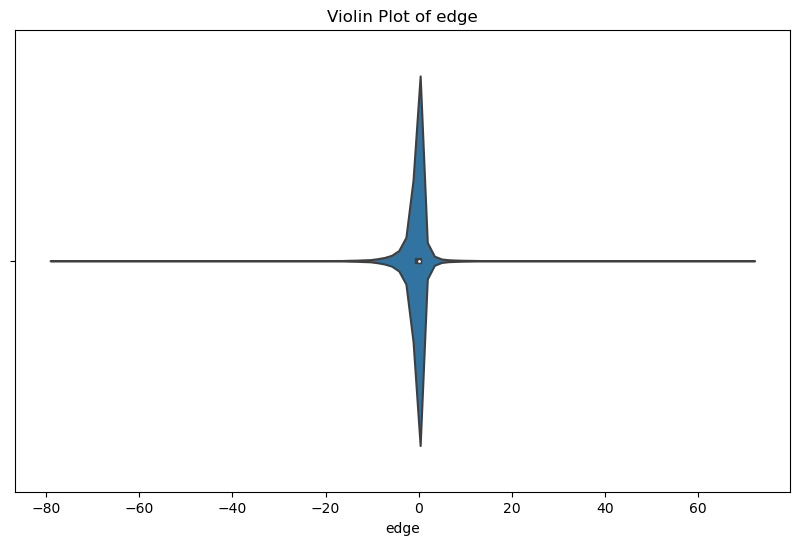

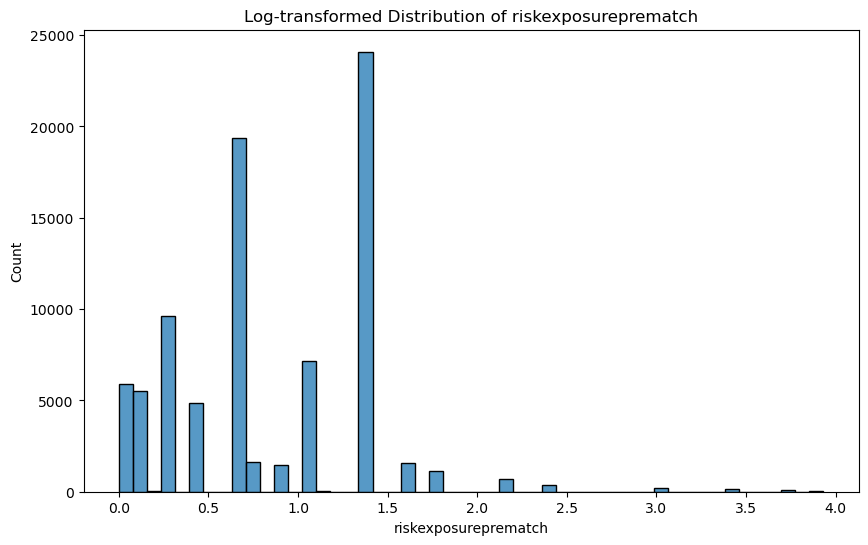

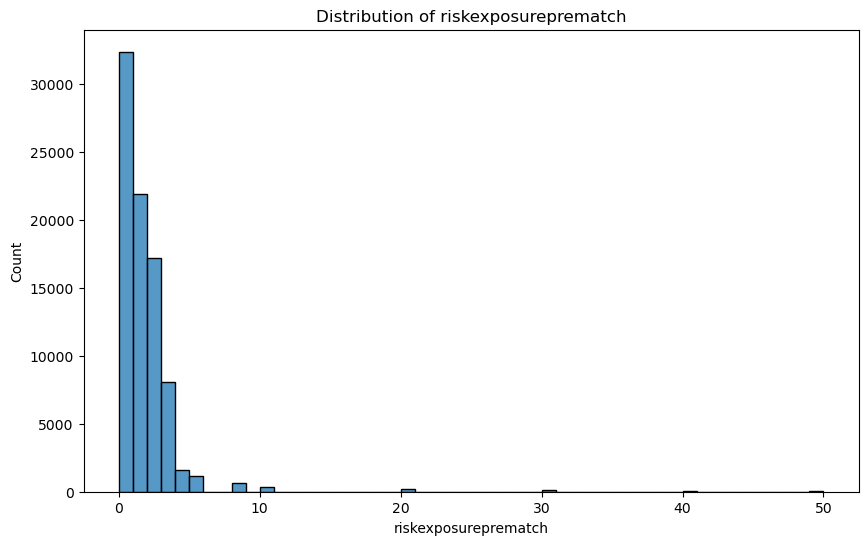

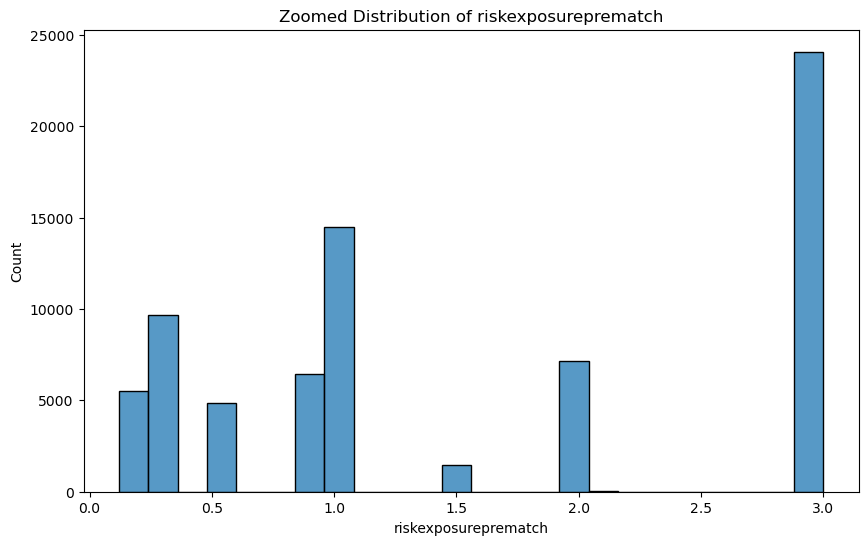

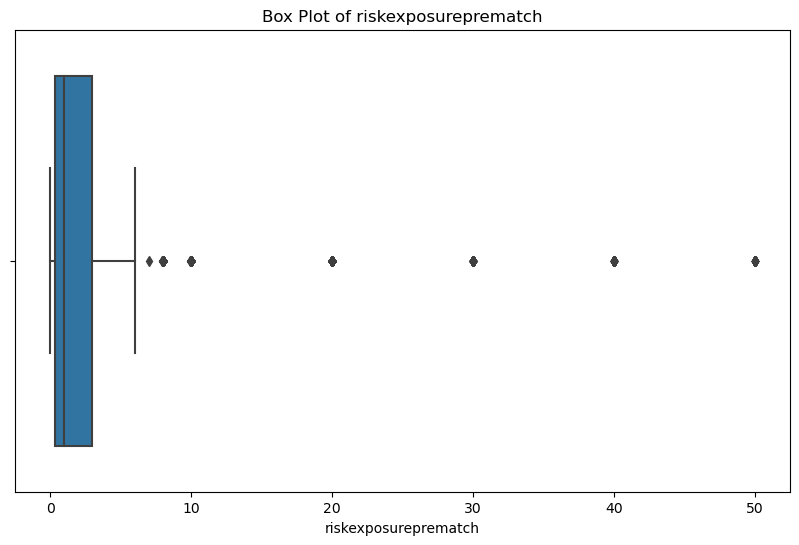

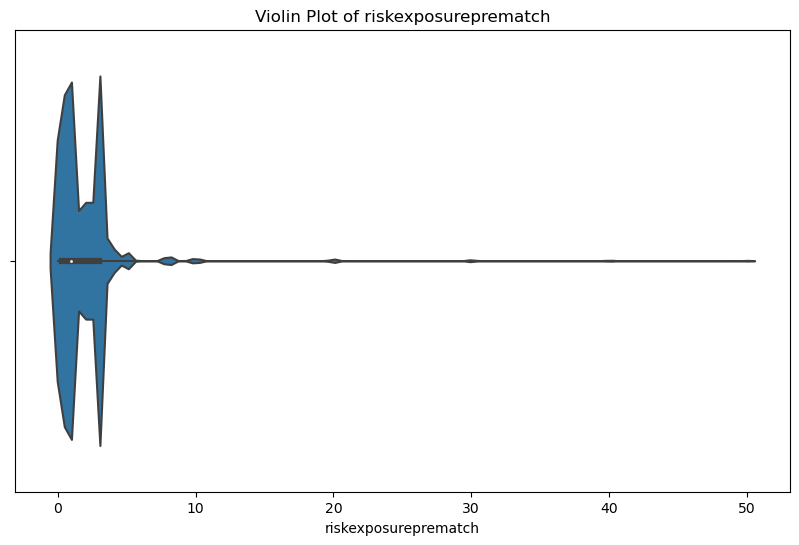

In [41]:

def generate_zoomed_histogram(data, column_name):
    lower_limit = data[column_name].quantile(0.10)
    upper_limit = data[column_name].quantile(0.90)
    restricted_data = data[(data[column_name] >= lower_limit) & (data[column_name] <= upper_limit)]
    
    # Dynamically calculate bin width based on IQR and data density (Freedman-Diaconis rule)
    iqr = restricted_data[column_name].quantile(0.75) - restricted_data[column_name].quantile(0.25)
    bin_width = 2 * iqr * (len(restricted_data[column_name])**(-1/3))
    bins = int((upper_limit - lower_limit) / bin_width)

    plt.figure(figsize=(10, 6))
    sns.histplot(restricted_data[column_name], bins=bins)
    plt.title(f'Zoomed Distribution of {column_name}')
    plt.show()

# Define a function to create various plots for a given dataset and column name
def generate_plots(data, column_name):
    # 1. Log-transformed Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(data[column_name]), bins=50)
    plt.title(f'Log-transformed Distribution of {column_name}')
    plt.show()

    #2. Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot((data[column_name]), bins=50)
    plt.title(f'Distribution of {column_name}')
    plt.show()

    # 3. Zoomed-in Histogram (Modify the upper_limit based on the data's range)
    generate_zoomed_histogram(data, column_name)

    # 4. Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.show()

    # 5. Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[column_name])
    plt.title(f'Violin Plot of {column_name}')
    plt.show()

# Iterate over numeric columns in bets_encrypted dataset and generate plots
for column in bets_encrypted.select_dtypes(include=['float64', 'int64']):
    generate_plots(bets_encrypted, column)

# Iterate over numeric columns in tag_changes dataset and generate plots
generate_plots(tag_changes, column_name='riskexposureprematch')

In [28]:
bets_encrypted_2 = orig_bets_encrypted.copy()
# Define the bins
bins = [0, 10, 25, 100, 1000, float('inf')]

# Define the bin labels
labels = ['£0-£10', '£10-£25', '£25-£100', '£100-£1000', '>£1000']

# Create a new column in the DataFrame for the stake brackets
bets_encrypted_2['stake_brackets'] = pd.cut(bets_encrypted_2['stake_gbp'], bins=bins, labels=labels)

# Count the number of bets in each stake bracket
stake_counts = bets_encrypted_2['stake_brackets'].value_counts().sort_index()

print(stake_counts)



£0-£10        2072957
£10-£25        264072
£25-£100       225098
£100-£1000      70114
>£1000           3234
Name: stake_brackets, dtype: int64


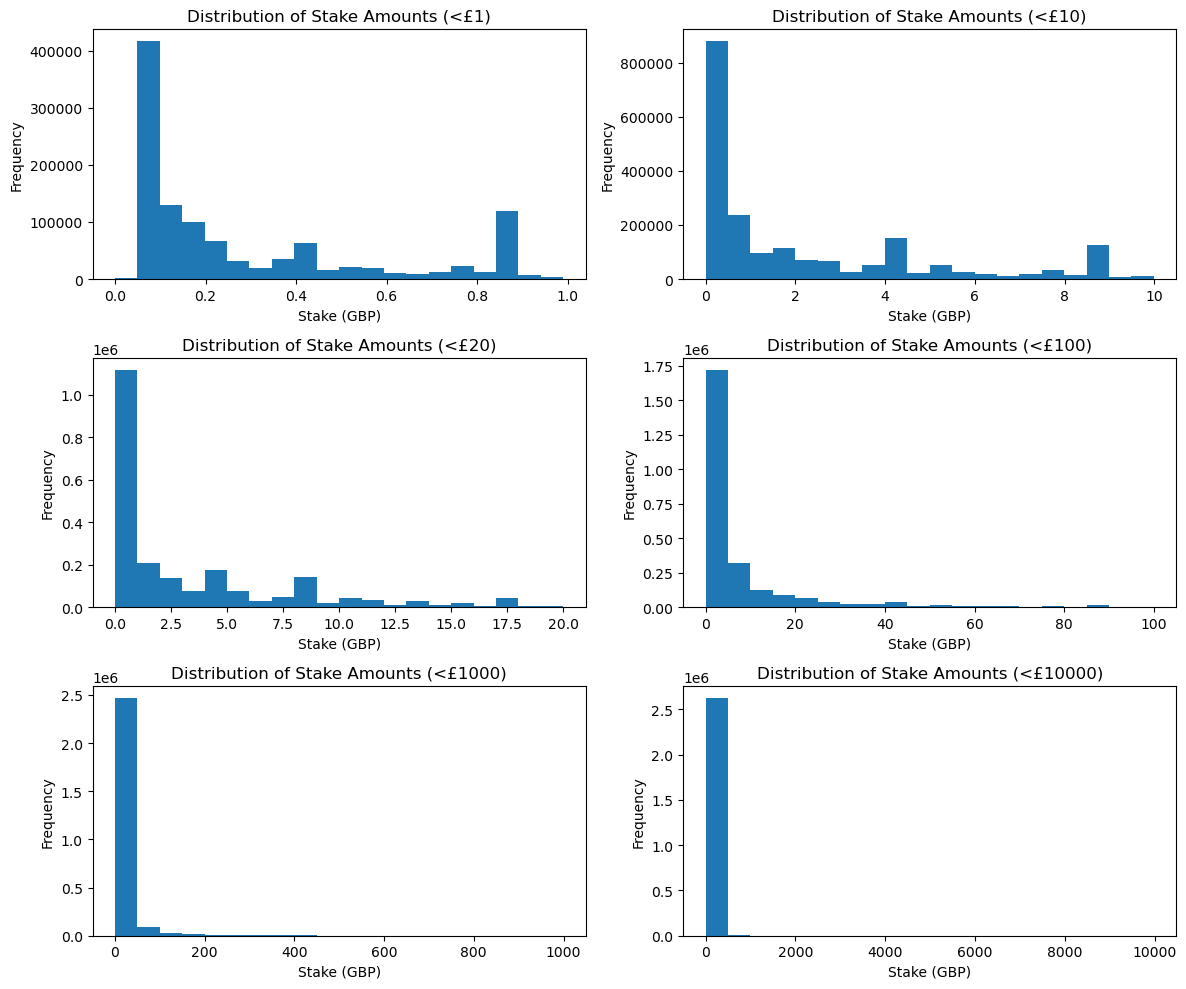

In [29]:
#distribution of stake_gbp, less than certain amounts

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

under_1 = bets_encrypted['stake_gbp'][bets_encrypted['stake_gbp']<1]
under_10 = bets_encrypted['stake_gbp'][bets_encrypted['stake_gbp']<10]
under_20 = bets_encrypted['stake_gbp'][bets_encrypted['stake_gbp']<20]
under_100 = bets_encrypted['stake_gbp'][bets_encrypted['stake_gbp']<100]
under_1000 = bets_encrypted['stake_gbp'][bets_encrypted['stake_gbp']<1000]
under_10000 = bets_encrypted['stake_gbp'][bets_encrypted['stake_gbp']<10000]

axes[0,0].hist(under_1, bins=20)  # Filtered for x < 10
axes[0,0].set_xlabel('Stake (GBP)')
axes[0,0].set_ylabel('Frequency')  # Adjusted y-axis label
axes[0,0].set_title('Distribution of Stake Amounts (<£1)')

axes[0,1].hist(under_10, bins=20)  # Filtered for x < 10
axes[0,1].set_xlabel('Stake (GBP)')
axes[0,1].set_ylabel('Frequency')  # Adjusted y-axis label
axes[0,1].set_title('Distribution of Stake Amounts (<£10)')

axes[1,0].hist(under_20, bins=20)  # Filtered for x < 10
axes[1,0].set_xlabel('Stake (GBP)')
axes[1,0].set_ylabel('Frequency')  # Adjusted y-axis label
axes[1,0].set_title('Distribution of Stake Amounts (<£20)')

axes[1,1].hist(under_100, bins=20)  # Filtered for x < 10
axes[1,1].set_xlabel('Stake (GBP)')
axes[1,1].set_ylabel('Frequency')  # Adjusted y-axis label
axes[1,1].set_title('Distribution of Stake Amounts (<£100)')

axes[2,0].hist(under_1000, bins=20)  # Filtered for x < 10
axes[2,0].set_xlabel('Stake (GBP)')
axes[2,0].set_ylabel('Frequency')  # Adjusted y-axis label
axes[2,0].set_title('Distribution of Stake Amounts (<£1000)')

axes[2,1].hist(under_10000, bins=20)  # Filtered for x < 10
axes[2,1].set_xlabel('Stake (GBP)')
axes[2,1].set_ylabel('Frequency')  # Adjusted y-axis label
axes[2,1].set_title('Distribution of Stake Amounts (<£10000)')

plt.tight_layout()
plt.show()

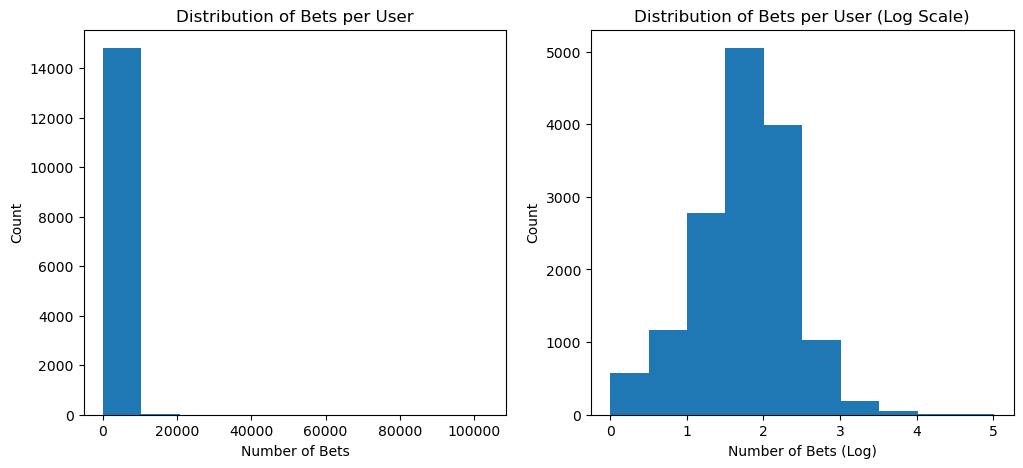

In [30]:
# distribution of bets per user

# Calculate the number of bets per user
bets_per_user = bets_encrypted['encrypted_user_no'].value_counts()
log_bpu = np.log10(bets_per_user)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution of bets per user
axes[0].hist(bets_per_user, bins=10)
# Setting the x-axis label and title
axes[0].set_xlabel('Number of Bets')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Bets per User')

axes[1].hist(log_bpu, bins=10)
axes[1].set_xlabel('Number of Bets (Log)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Bets per User (Log Scale)')

# Display the plot
plt.show()

In [32]:
# Group by encrypted_user_no and count the number of bets (assuming betTimestamp is unique for each bet)
bets_encrypted_2['total_bets'] = bets_encrypted_2.groupby('encrypted_user_no')['betTimestamp'].transform('count')

# Define the bins for different amount of bets
bins = [0, 50, 100, 200, 500, 1000, 2500, 5000, 10000, 20000, np.inf]  # np.inf represents an upper limit of infinity

# Create labels for these bins
labels = ['1-50', '51-100', '101-200', '201-500', '501-1000', '1001-2500', '2501-5000', '5001-10000', '10001-20000', '20000+']

# Create a new column with categorized total bets
bets_encrypted_2['bet_categories'] = pd.cut(bets_encrypted_2['total_bets'], bins=bins, labels=labels, include_lowest=True)

# Now, get the counts for each bet category
bet_category_counts = bets_encrypted_2['bet_categories'].value_counts().sort_index()

print(bet_category_counts)


1-50           142213
51-100         227815
101-200        399420
201-500        537035
501-1000       301833
1001-2500      256781
2501-5000      170098
5001-10000     138124
10001-20000    173138
20000+         289117
Name: bet_categories, dtype: int64


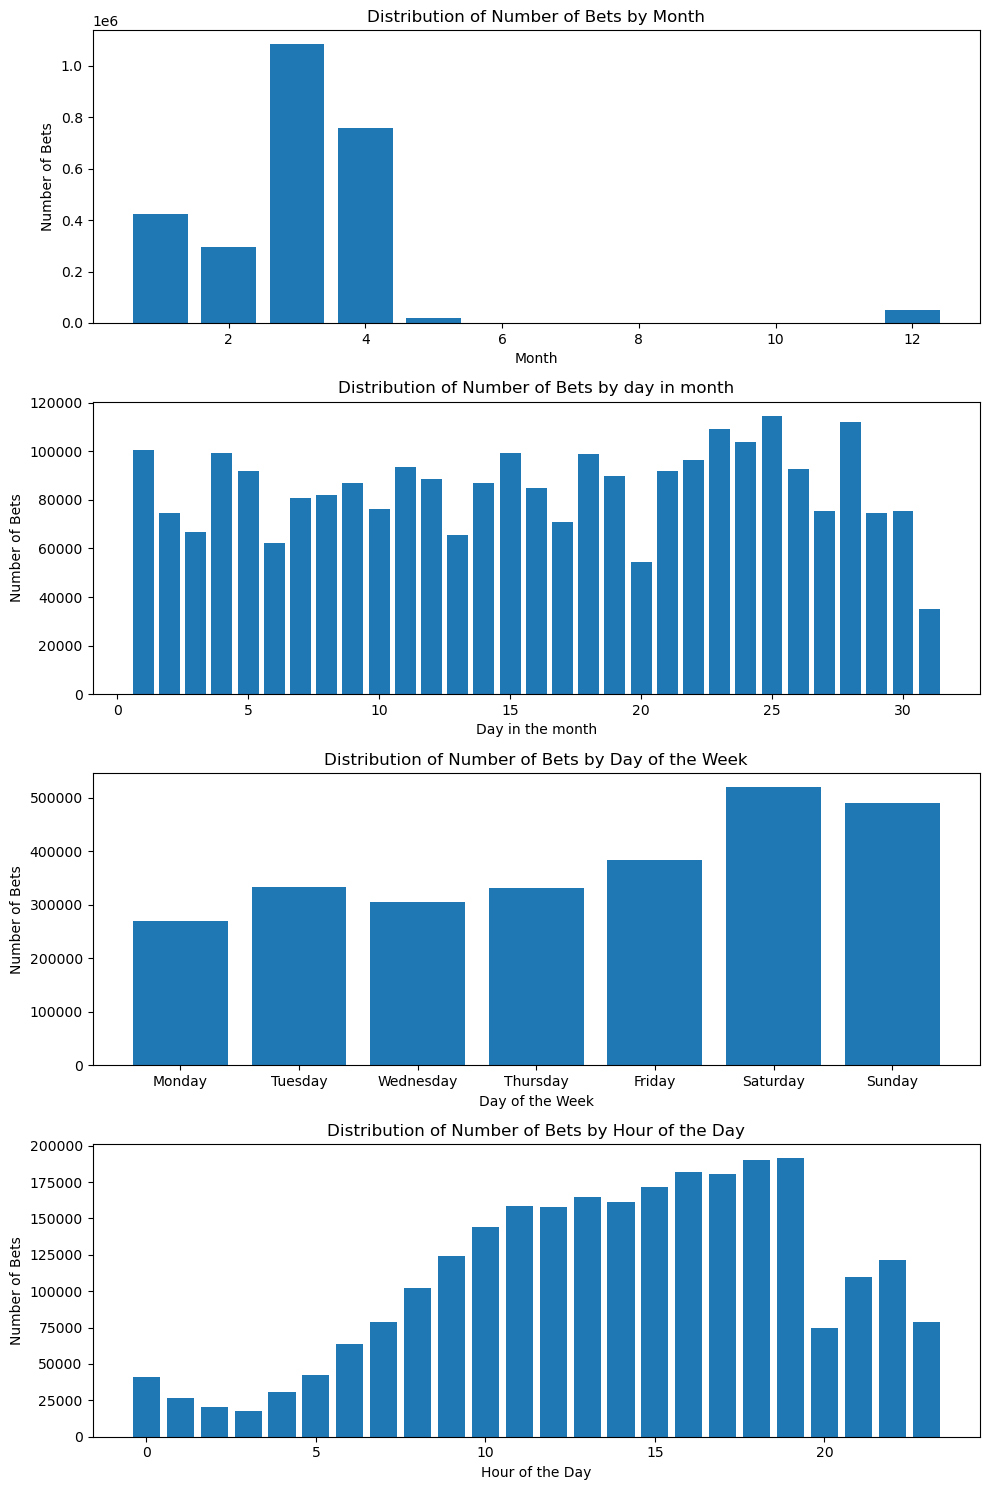

In [33]:
# bets by hour of the day

# Assuming you have a DataFrame named 'data' containing the dataset
bets_encrypted['betTimestamp'] = pd.to_datetime(bets_encrypted['betTimestamp'])  # Convert 'betTimestamp' to datetime if not already done

# Extract the hour from the 'betTimestamp' column
bets_encrypted['hour'] = bets_encrypted['betTimestamp'].dt.hour
# Calculate the number of bets for each hour
hourly_bets_count = bets_encrypted.groupby('hour')['betTimestamp'].count()

# Extract the month from the 'betTimestamp' column
bets_encrypted['month'] = bets_encrypted['betTimestamp'].dt.month
# Calculate the number of bets for each month
monthly_bets_count = bets_encrypted.groupby('month')['betTimestamp'].count()
# Map the day of the week labels
month_labels = list(calendar.month_name)

# Extract the day from the 'betTimestamp' column
bets_encrypted['day'] = bets_encrypted['betTimestamp'].dt.day
# Calculate the number of bets for each day
daily_bets_count = bets_encrypted.groupby('day')['betTimestamp'].count()

# Extract the day of the week from the 'betTimestamp' column
bets_encrypted['day_of_week'] = bets_encrypted['betTimestamp'].dt.dayofweek
# Calculate the number of bets for each day of the week
day_bets_count = bets_encrypted['day_of_week'].value_counts().sort_index()
# Map the day of the week labels
day_labels = list(calendar.day_name)

fig, axes = plt.subplots(4, 1, figsize=(10, 15))

# Plot the distribution of number of bets against time of the day
axes[0].bar(monthly_bets_count.index, monthly_bets_count.values)
# axes[0].bar(month_labels, monthly_bets_count)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Bets')
axes[0].set_title('Distribution of Number of Bets by Month')

# Plot the distribution of number of bets against time of the day
axes[1].bar(daily_bets_count.index, daily_bets_count.values)
axes[1].set_xlabel('Day in the month')
axes[1].set_ylabel('Number of Bets')
axes[1].set_title('Distribution of Number of Bets by day in month')

# Plot the distribution of number of bets against time of the day
# axes[2].bar(day_bets_count.index, day_bets_count.values)
axes[2].bar(day_labels, day_bets_count)
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Bets')
axes[2].set_title('Distribution of Number of Bets by Day of the Week')

# Plot the distribution of number of bets against time of the day
axes[3].bar(hourly_bets_count.index, hourly_bets_count.values)
axes[3].set_xlabel('Hour of the Day')
axes[3].set_ylabel('Number of Bets')
axes[3].set_title('Distribution of Number of Bets by Hour of the Day')

plt.tight_layout()
plt.show()